**Shopify 2021 Fall Challenge** 

Aman Singh






# Question 1

**A) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. **

Taking an initial look at the data, the reason why the AOV is abnormally high is due to outliers, mainly due to the fact that the majority of orders were under $\$1000$ ,   but we have some over $ \$ 100k$ and some over $\$700k$, which are extreme outliers. Since the AOV is essentially the mean of order values, it is suspectiable to outliers which is what has occurred here. We take a deeper look into the data using pandas.


In [ ]:
#imports
import numpy as np 
import pandas as pd 

#import dataset
df = pd.read_csv("/data/DataSet.csv")
df.head() # get a view of what the frame looks like

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [ ]:
# brief summary of the orders
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

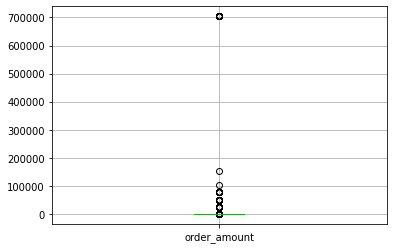

In [ ]:
df.boxplot(column='order_amount')

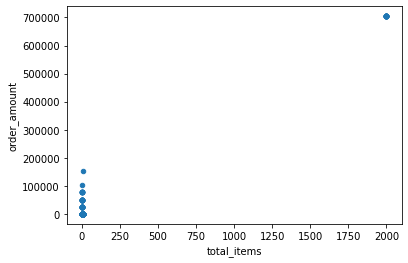

In [ ]:
df.plot.scatter(x='total_items', y='order_amount')

Some important things to note. The mean is 3145.128 which is exactly our AOV value, confirming it is the mean. We also note that we confirm the outliers have a huge impact, as we note that 75% of orders are below $390, which suggests most orders aren't even close to our AOV value. We also note thte standard deviation is 41282.539349, which is a very very large value, which indicates many of the data points are far away from the mean are not clustered near the AOV. Using the boxplot, we see that the majority of data is clustered towards the 100-1000 range. It is hard to see the rest of the data from this graph, so we will remove outliers temporarily as we suspect these large orders (which occur consistently) are from other stores or supplier orders. The scatter plot shows us that theses extreme orders are also ordering two thousand shoes while the majority of orders are not on the same order of magnitude.

In [ ]:
# We can do a common technique for removing outliers, which is using the range of [Q1 - 1.5 IQR, Q3 1.5 IQR]
Q1 = df.order_amount.quantile(q=0.25)
Q3 = df.order_amount.quantile(q=0.75) 
IQR = Q3 - Q1

df_no_outliers = df[( (df.order_amount >= (Q1 - 1.5 * IQR)) & (df.order_amount <= (Q3 + 1.5 * IQR)))]


In [ ]:
# brief summary of the outliers removed data
df_no_outliers = df[( (df.order_amount >= (Q1 - 1.5 * IQR)) & (df.order_amount <= (Q3 + 1.5 * IQR)))]
df_no_outliers.order_amount.describe()

count    4859.000000
mean      293.715374
std       144.453395
min        90.000000
25%       162.000000
50%       280.000000
75%       380.000000
max       730.000000
Name: order_amount, dtype: float64

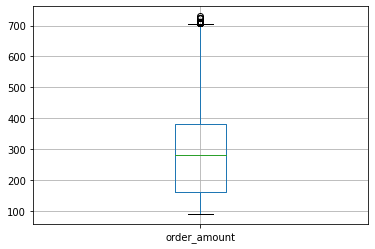

In [ ]:
df_no_outliers.boxplot(column='order_amount')

Now we note looking at the outliers removed data, the AOV is $293.715374, which is significantly less than our AOV for the entire dataset, which meant our outliers indeed had a significant impact. We also note, that half of these outlier removed data points are between 162 and 380 dollars, which is a narrower IQR than the overall dataset.  The standard deviation also decreased significantly, indicating these data points are closer to the mean, although we note that isi still some values away, closer to the 700-730 dollar range. 

So the question arises, what is a better way to evaluate this data? There are a few options. First, is to consider the AOV of the data without outliers, which will remove all abnormally large datapoints, which will give a more informative answer, but this means we exclude the huge orders. Another possible way is to track supplier / store orders differently from individually consumers, and keep track of 2 AOV's, as we may be interested in knowing the average order for consumers and suppliers. Another option, is to use the median since it is not effeected by outliers and we can get of the middle average value of an order. When conducting this analysis, it is important to look at our results and question if they make sense, and if not, look at our process as well as explore the data further, to find statistics and metrics that better match the business use case, in addition to using more robust statistics and methods.

**B) What metric would you report for this dataset?**

I would report the median order value because it is more robust and thus not suspectiable to being influenced due to outlier orders (in this case, very very large orders which do not represent the typical consumers of our store).

**C) What is its value?** 


In [ ]:
df.order_amount.median()

284.0

The median order value is 284.

# Question 2

**A) How many orders were shipped by Speedy Express in total?**



The orders shipped by Speedy Express is 54. 

This query counts numbers of ordered shipped by Speedy Express
```
SELECT COUNT(*)
FROM Orders ord JOIN 
	Shippers ship 
    ON ship.ShipperId = ord.ShipperId
WHERE ship.ShipperName = "Speedy Express"
```



**B) What is the last name of the employee with the most orders?**

The last name of the employee with the most orders is Peacock 
```

SELECT e.LastName
FROM Orders ord JOIN 
    Employees e 
    ON e.EmployeeID = ord.EmployeeID
GROUP BY e.LastName
ORDER BY COUNT(*) DESC
LIMIT 1
```




**C)What product was ordered the most by customers in Germany?**

The most ordered product by German customers is Boston Crab Meat.
```
SELECT p.ProductName
FROM ORDERS ord JOIN 
    Customers c
    JOIN
    Products p JOIN
    OrderDetails od
 WHERE c.country = "Germany" AND ord.OrderID = od.OrderID AND od.ProductID = p.ProductID AND c.CustomerID = ord.CustomerID
 GROUP BY p.ProductID
 ORDER BY SUM(Quantity) DESC
 LIMIT 1
```

